# Loan Approval Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Data Collection & Pre-Processing

In [4]:
df=pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.shape

(4269, 13)

In [6]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 466.9+ KB


In [10]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [11]:
df[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [12]:
df[' education'].dtype

dtype('O')

In [13]:
#Data Preprocessing and Visualization

In [14]:
df.drop("loan_id",axis=1,inplace=True)

In [15]:
obj=(df.dtypes=="object")
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 3


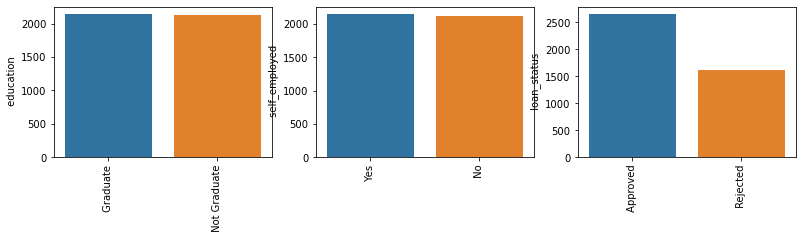

In [16]:
obj = (df.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1
  
for col in object_cols: 
  y = df[col].value_counts() 
  plt.subplot(11,4,index) 
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y) 
  index +=1

In [17]:
# Import label encoder

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object') 
for col in list(obj[obj].index):
    df[col]=label_encoder.fit_transform(df[col])

In [18]:
# To find the number of columns with  
# datatype==object 
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


# Splitting Dataset 

In [19]:
from sklearn.model_selection import train_test_split 

In [20]:
X = df.drop([' loan_status'],axis=1) 
y = df[' loan_status'] 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (3415, 11)
Shape of y_train =  (3415,)
Shape of X_test =  (854, 11)
Shape of y_test =  (854,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

In [24]:
knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7, 
                             criterion = 'entropy', 
                             random_state =7)
svc = SVC()
lc = LogisticRegression() 

In [25]:
# making predictions on the training set 

for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_train) 
    print("Accuracy score of ", clf.__class__.__name__, 
          "=",100*metrics.accuracy_score(y_train,  
                                         y_pred))

Accuracy score of  RandomForestClassifier = 99.70717423133236
Accuracy score of  KNeighborsClassifier = 78.03806734992679
Accuracy score of  SVC = 62.079062957540266
Accuracy score of  LogisticRegression = 73.26500732064422


In [26]:
# making predictions on the testing set 

for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test) 
    print("Accuracy score of ", 
          clf.__class__.__name__,"=", 
          100*metrics.accuracy_score(y_test, 
                                     y_pred))

Accuracy score of  RandomForestClassifier = 97.65807962529274
Accuracy score of  KNeighborsClassifier = 53.39578454332553
Accuracy score of  SVC = 62.76346604215457
Accuracy score of  LogisticRegression = 72.48243559718969


# Conclusion